<a href="https://colab.research.google.com/github/randerson112358/Python/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [0]:
# Import the libraries
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [0]:
# Get the data
log = pd.read_csv("Login.csv")

In [0]:
# Twitter Api Credentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True) 

In [0]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @rogerfederer @RafaelNadal @Trevornoah Roger’s foundation partners with local NGOs in six countries in southern Africa to improve early learning and basic education. It’s an impressive organization, and I encourage you to consider supporting its work: https://t.co/fQmyFmjvbm

2) I’m excited to team up with @rogerfederer again for the Match in Africa Friday in Cape Town. Playing alongside Roger is always a thrill, and I can’t wait to face off against @RafaelNadal and @Trevornoah. https://t.co/WMlbBtZwVC

3) As we conclude our foundation’s second decade of work in global health and education, I have never been more optimistic about the opportunity to improve life for the world’s poorest. I look forward to partnering with you on the work ahead. https://t.co/yUcbdLkBm7

4) Thank you, Sue, for all of your contributions to our foundation. I look forward to continuing our work together on important health and education projects that will improve lives. https://t.

In [0]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@rogerfederer @RafaelNadal @Trevornoah Roger’s...
1,I’m excited to team up with @rogerfederer agai...
2,As we conclude our foundation’s second decade ...
3,"Thank you, Sue, for all of your contributions ..."
4,Game on! https://t.co/fhOOsAvqdc


In [0]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Roger’s foundation partners with local NGOs...
1,I’m excited to team up with again for the Mat...
2,As we conclude our foundation’s second decade ...
3,"Thank you, Sue, for all of your contributions ..."
4,Game on!
...,...
95,I am hopeful that we can substantially alter t...
96,The docuseries about my life and work is out t...
97,Adapting to climate change requires support fr...
98,The new docuseries that looks at my work is ou...


In [0]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,As we conclude our foundation’s second decade ...,0.166667,0.166667
1,"Thank you, Sue, for all of your contributions ...",1.000000,0.400000
2,Game on!,0.400000,-0.500000
3,If the world keeps up the fight against these ...,0.000000,0.000000
4,The world has only begun to tap into all the w...,0.676136,0.161932
...,...,...,...
95,Adapting to climate change requires support fr...,0.477273,0.318182
96,The new docuseries that looks at my work is ou...,0.454545,0.136364
97,As governments invest more in primary health c...,0.333333,0.300000
98,Melinda and I started out ahead. But hundreds ...,0.950000,0.750000


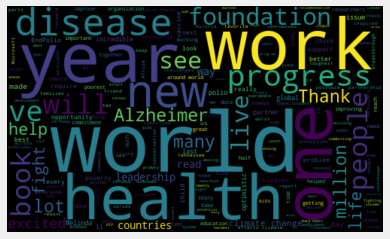

In [0]:
'''
Let's see how well the sentiments are distributed. 
A good way to accomplish this task is by understanding the common words by plotting word clouds.
A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word 
appears in text, the bigger and bolder it appears in the word cloud.
Let’s visualize all the words in the data using the word cloud plot.
'''

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,As we conclude our foundation’s second decade ...,0.166667,0.166667,Positive
1,"Thank you, Sue, for all of your contributions ...",1.000000,0.400000,Positive
2,Game on!,0.400000,-0.500000,Negative
3,If the world keeps up the fight against these ...,0.000000,0.000000,Neutral
4,The world has only begun to tap into all the w...,0.676136,0.161932,Positive
...,...,...,...,...
95,Adapting to climate change requires support fr...,0.477273,0.318182,Positive
96,The new docuseries that looks at my work is ou...,0.454545,0.136364,Positive
97,As governments invest more in primary health c...,0.333333,0.300000,Positive
98,Melinda and I started out ahead. But hundreds ...,0.950000,0.750000,Positive


In [0]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) As we conclude our foundation’s second decade of work in global health and education, I have never been more optimistic about the opportunity to improve life for the world’s poorest. I look forward to partnering with you on the work ahead. 

2) Thank you, Sue, for all of your contributions to our foundation. I look forward to continuing our work together on important health and education projects that will improve lives. 

3) The world has only begun to tap into all the ways AI will help people live healthier lives. I’m excited about the launch of ’s new AI for Health initiative, which connects researchers and organizations with world-class AI talent and resources. 

4) I joined  ten years (and a couple of days) ago. These are some of my favorite tweets. What’s your favorite tweet from the last ten years? 

5)  There are still too many children—many living in some of the hardest-to-reach places on the planet—who aren’t getting basic vaccines. Gavi is the b

In [0]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1



Printing negative tweets:

1) Game on! 

2) It's great to see Microsoft's leadership in this area. Avoiding the worst effects of climate change will require innovation and investment to get us to net zero carbon emissions across all sectors of the economy. 

3) These global health heroes have helped Bangladesh become a model for other countries for how to respond to infectious disease outbreaks: 

4) It’s encouraging to see these results. Typhoid is especially deadly for young children, and a vaccine like this has the potential to save millions of lives. 

5) I was deeply moved by Tayari Jones’s story of a married couple whose lives get torn apart by an incident of injustice. The book is so well-written that you’ll find yourself sucked into it despite the heavy subject matter. 

6) In Abu Dhabi this week, the world committed $2.6B to EndPolio. Thank you  for your leadership in helping push this terrible disease to the brink of eradication. 

7) We have cut the number of child deaths in

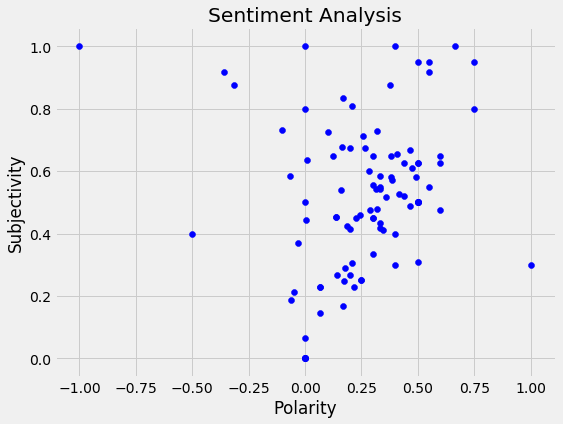

In [0]:
# Plotting
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [0]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

81.0

In [0]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

9.0

In [0]:
# Show the value counts
df['Analysis'].value_counts()

Positive    81
Neutral     10
Negative     9
Name: Analysis, dtype: int64

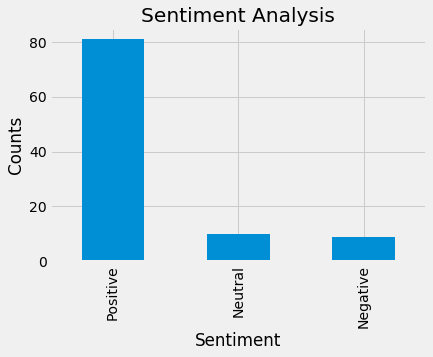

In [0]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()